# MUSIC Bayesian Regression - CoB191

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import pymc3 as pm
import pandas as pd
from scipy import stats

In [2]:
#eMpowerment
M =   (5, 4.8, 5.6, 4.2, 4.2, 4.6, 4.6, 5, 5.6, 4, 4, 4.4, 4.6, 4.8, 4.8, 5.8, 4, 4.4, 4.2, 4.2, 5.2, 4.6, 4.8, 4.6,
       3.6, 4.6, 4.6, 5, 4, 4.2, 4.8, 5, 4.8, 5.8, 4.4, 5, 4.2, 4.2, 5.2, 3.8, 5.2, 5.8, 4.2, 3.6, 4, 4.8, 5.6, 4, 4.4,
       5, 4.6, 5.2, 5.6, 4.6, 5, 4.4, 5, 3.2, 5, 3.8, 5, 4.8, 4.6, 5.2, 5.4, 4.2, 3.4, 4.2, 2.8, 4.2, 4.8, 5, 4.8, 4.8,
       6, 5, 4.4, 4.2, 5, 4, 4, 4.2, 5.2, 3.4, 4.6, 3.4, 4.8, 5, 4.2, 3.8, 5.2, 4.6, 4.8, 4.2, 3.4, 4.4, 4.4, 4.4, 4.6,
       3.6, 5.4, 3.8, 4, 6, 2, 5, 4.6, 4.8, 4, 4.4, 4.4, 5.6, 4.4, 4.6, 4.6, 4.8, 5, 5.4, 4, 4.6, 4, 4.2, 3.8, 5.4, 4.2,
       5, 4.2, 4, 3.8, 5, 6, 4, 3.8, 3.6, 5, 5, 3, 5.8, 4.2, 4.6, 4, 4.6, 4.6, 4.8, 3.4, 5.2, 6, 4, 5.2, 5)

#Usefulness
U =   (2.4, 5.4, 6, 4, 4.4, 5.6, 3.8, 4.6, 5.2, 4, 2.6, 2.4, 3.8, 3.8, 4.6, 4.6, 3.6, 5, 5, 4, 4.6, 4.6, 5, 4, 3.4, 4.4,
       4.6, 4.4, 4.8, 4.6, 4.6, 5.4, 5.2, 5.2, 4.4, 4.4, 4, 4.2, 5.6, 4, 5.4, 5.8, 4.6, 4.2, 4.2, 5.4, 3.2, 5.2, 4.8, 3.2,
       3.4, 5.6, 6, 5, 4.8, 3, 5.2, 4, 4.8, 4.4, 5.2, 5, 5.2, 5, 3, 5.6, 3.6, 4, 5, 4.2, 5.2, 4.6, 5, 5, 5, 4, 3.2, 5.2,
       4.2, 4, 3.4, 3.8, 4.8, 3.4, 4.8, 2.2, 5.4, 5.8, 3, 4.4, 5, 4.4, 6, 2.4, 5, 4.8, 4, 5.4, 4.2, 4.2, 4.8, 2.6, 4.8,
       4.8, 2.4, 5, 3.6, 4.6, 3.8, 4.8, 4.2, 4.6, 5, 4.8, 3.6, 3.2, 5.4, 5, 3.8, 5.2, 3.2, 5.2, 4.8, 4.8, 4.6, 4.8, 5, 5.6,
       3.8, 4.6, 6, 5, 4.8, 4, 4.2, 4.4, 1.6, 4.6, 4.8, 3.6, 4, 2.8, 4.2, 4.8, 3.4, 5, 6, 6, 4.4, 4.8) 

#Success
S =   (3, 6, 6, 5, 4.25, 5.25, 5.25, 4, 4.5, 5, 3.5, 3.5, 3.75, 4.75, 5, 5.25, 3.75, 4.25, 5, 4, 5, 5.25, 4.75, 2.25, 3,
       4.75, 4.5, 5, 3.5, 4.5, 4.5, 4.75, 4.5, 6, 5, 4, 4.25, 4, 4.25, 3.25, 5.75, 6, 4.25, 4, 4.5, 6, 3.25, 2.25, 4.5,
       4, 2.75, 6, 5.25, 5, 4, 4.75, 5.75, 3.25, 5, 3.5, 5, 5.25, 5, 4.25, 3.5, 5, 4.25, 3.25, 5, 5.75, 4.75, 4.75, 4.25,
       5.75, 4.25, 5, 3.25, 4, 5.25, 3.25, 4.25, 3.5, 5.75, 3.75, 4.5, 2.25, 4, 5.25, 3.75, 4, 5, 4.75, 6, 3.25, 4.75, 5,
       3.5, 4.25, 3.75, 4.75, 4.25, 3, 3.5, 5.25, 1.75, 5.5, 4.25, 4.5, 4, 4.25, 3.5, 6, 4, 4.5, 4, 3.5, 4, 4.5, 3, 4.5,
       5.5, 5, 5, 4, 3.25, 5, 5, 5, 2.75, 5, 6, 5, 4.5, 2.75, 4, 3.25, 3, 6, 2.25, 5, 4, 2.75, 5, 3, 5.5, 4.75, 6, 6, 4.75, 5)

#Interest
I =   (2.83, 5.33, 5.17, 4.17, 4.33, 5.17, 3.33, 4.5, 5.17, 4.17, 3.17, 2.67, 4.33, 3, 4, 4.33, 4.5, 4.17, 4.83, 4.17, 5,
       5.17, 4.67, 4.5, 2.5, 4.17, 4.67, 5, 3.67, 4.33, 4.33, 4.83, 3.83, 4.67, 4.33, 3.83, 4.33, 3.67, 5, 2.83, 5.33, 6,
       3.5, 3.67, 4.17, 6, 3.17, 4.33, 4.33, 3.83, 3.5, 5, 5, 4.83, 4.83, 3.83, 4.83, 3, 5.17, 4.17, 5.5, 4.83, 4.5, 4.33,
       3.33, 4.33, 4.33, 3, 4.83, 3.67, 4.83, 4.5, 5, 5.83, 5.17, 4.83, 3.5, 3.33, 4.83, 3.5, 3, 4.17, 5.33, 3, 4.5, 3, 4.5,
       5.67, 4.83, 4.33, 4.67, 3.67, 5, 2.5, 3.67, 4.83, 3, 4.17, 2.67, 4.5, 5.33, 3.67, 4.67, 5.17, 1, 5, 4.83, 5.17, 4.17,
       3.5, 3.17, 5.17, 4.33, 4.83, 3.83, 3.33, 4.67, 5.5, 3.83, 4.83, 4.5, 5.17, 3, 5, 2.17, 4.17, 5.33, 5.17, 4.33, 4.83,
       6, 4.5, 5, 4.17, 4.83, 5, 3.17, 5.17, 4, 3.83, 3.83, 4.5, 4.5, 4.33, 2.33, 4.67, 6, 6, 4.83, 5)

#Caring
C =   (6, 6, 6, 5, 4.5, 5.83, 4.67, 5.5, 6, 5.17, 5.67, 5.83, 5, 5.33, 5.5, 5.33, 5.67, 5, 5.83, 5.5, 6, 6, 6, 5.5, 4.83,
       6, 6, 6, 5.67, 6, 6, 5.33, 5.67, 6, 5.83, 5.5, 5.67, 5, 5.67, 5.33, 6, 6, 5.67, 5.17, 5.67, 5.67, 5.83, 5.33, 5.5,
       5.67, 5.5, 5.5, 5.83, 5.5, 6, 5, 6, 4.67, 5.83, 4.83, 5.83, 6, 6, 6, 5.67, 5.67, 5.17, 6, 4.67, 6, 5, 5.83, 5.33,
       5.67, 6, 5.33, 4.83, 5, 6, 5.33, 5.33, 5, 6, 5.17, 5.5, 5, 6, 6, 5.83, 6, 5.17, 5.5, 6, 5.17, 5, 6, 5.67, 4.83, 6,
       6, 5.83, 5.33, 5.33, 6, 3.17, 5.17, 4.83, 6, 5.33, 5.67, 5.33, 5.83, 5.5, 5, 5.83, 5.33, 5.83, 6, 6, 5.33, 6, 5.67,
       6, 5.67, 4.83, 6, 5.83, 5.5, 5.83, 5.67, 5.83, 5.83, 5.5, 5.67, 6, 6, 5.67, 6, 4.83, 5.5, 5.17, 5.83, 5.83, 5.67,
       5.17, 5.83, 6, 6, 5.83, 6)

#Effort
E =   (3.5, 5.25, 5.75, 5, 4, 4.75, 6, 3, 4, 5, 4, 4.75, 5.25, 3.25, 4.75, 2, 4, 4, 4.25, 4, 5, 5, 4.5, 3.25, 2.5, 4, 4,
       4, 4.25, 5, 3, 5.5, 3.5, 5, 4, 3, 4, 4.5, 5.5, 5.75, 5, 5, 3.75, 4.75, 4.75, 5.5, 2.75, 4.75, 5, 5, 4, 5.75, 5.75,
       4, 5, 4.75, 4.5, 5, 5, 6, 5.5, 4, 5.25, 4, 5, 5, 5, 2.25, 5, 4.75, 5, 5, 6, 5.25, 5.25, 4, 4.75, 5.5, 5.25, 2.75, 4,
       5.75, 5.5, 5, 4, 5, 4.5, 5.5, 5, 5.5, 5.25, 3.5, 5, 5, 4, 4.25, 2.5, 4, 5, 5, 4.25, 4, 4.25, 6, 5.75, 4, 4, 4.5, 4,
       4, 4, 5.75, 5, 4.75, 3.25, 3.5, 5.5, 5.75, 5.75, 4, 6, 5.5, 4, 5.5, 4, 4, 4, 5, 5, 4.25, 6, 4.5, 4, 5, 5, 5, 5.75,
       5.25, 4.5, 1.25, 2, 3.25, 4, 4.5, 2, 3.5, 5.75, 6, 5, 5)

#Final Grade
FG =  (78.2, 92.5, 79.524, 87.2, 82.9, 83.524, 69.724, 72.6, 71, 73, 74.324, 68.624, 77.6, 86.552, 87.076, 58.3, 74,
       80.752, 90.852, 83.652, 75.724, 85.924, 80.3, 86.2, 75.024, 82.524, 77.576, 91.5, 74.3, 82.1, 83.976, 81.9,
       62.8, 92.7, 92.124, 64.176, 76.352, 90.876, 80.6, 86.8, 92.076, 95.124, 78.076, 71.976, 90.324, 94.5, 72.776,
       72.224, 84.824, 68.776, 64.552, 97.6, 82.924, 80.924, 69.452, 76.052, 93.324, 74.124, 81.924, 73.052, 89.552,
       89.624, 75, 78.224, 71.476, 67.176, 79.588, 74.5, 90.16, 82.72, 87.88, 78.68, 83.48, 86.08, 73.32, 80.44, 70.48,
       72.56, 91.32, 62.8, 77.6, 65.64, 90.6, 59.4, 84.56, 77.76, 87.12, 72.32, 82.24, 71.6, 93.28, 88.92, 89.52, 79.88,
       85.52, 91.48, 59.44, 83.92, 84, 82.68, 74.16, 77.96, 73.96, 80.76, 71.36, 86.04, 86.8, 85.2, 79.4, 66.04, 81.64,
       93.28, 82.44, 87.12, 85.28, 83.48, 88.32, 72.04, 86.08, 77.52, 90.16, 80.76, 86.72, 84, 73.6, 80.16, 88.6, 81.16,
       71.88, 85.88, 71.64, 85.72, 87.96, 62.8, 77.92, 74.52, 71.72, 87.64, 76.88, 89.94, 66.68, 70.44, 80.96, 54.68, 75.36,
       83, 82.84, 96.36, 80.28, 78.32)

#Instructor Rating
IR = (5, 6, 4, 5, 5, 6, 4, 5, 6, 6, 6, 5, 6, 4, 5, 5, 4, 4, 5, 5, 6, 6, 6, 6, 4, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
      6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 4, 6, 4, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5,
      4, 4, 5, 6, 5, 5, 6, 4, 6, 4, 6, 6, 5, 5, 5, 6, 6, 3, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 4, 5, 6, 6, 4, 5, 5, 6, 5, 5,
      6, 4, 5, 6, 5, 5, 6, 6, 5, 5, 4, 6, 6, 6, 4, 6, 6, 5, 5, 5, 6, 6, 4, 6, 4, 6, 4, 6, 5, 5, 4, 6, 6, 6, 6, 5)

#Course Rating
CR = (3, 6, 4, 5, 4, 5, 3, 4, 6, 5, 4, 3, 4, 3, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 2, 4, 5, 5, 5, 3, 5, 6, 5, 5, 4, 4, 4, 4,
      4, 3, 6, 6, 4, 4, 4, 5, 1, 2, 4, 4, 4, 5, 4, 5, 5, 4, 5, 3, 5, 4, 5, 6, 4, 4, 4, 5, 4, 3, 5, 4, 5, 4, 5, 6, 5, 4,
      4, 4, 5, 4, 4, 4, 4, 3, 4, 2, 4, 6, 4, 4, 6, 5, 5, 3, 4, 4, 4, 4, 4, 4, 5, 2, 4, 6, 2, 4, 3, 6, 4, 4, 3, 5, 4, 5,
      4, 4, 5, 6, 3, 4, 5, 6, 4, 4, 3, 5, 5, 5, 4, 4, 5, 5, 5, 4, 4, 3, 3, 5, 3, 5, 4, 4, 5, 4, 3, 5, 6, 6, 5, 5)

Empowerment = np.array(M) 
Usefulness  = np.array(U)
Success     = np.array(S)
Interest    = np.array(I)
Caring      = np.array(C)
Effort      = np.array(E)
FinalGrade  = np.array(FG)
InsRating   = np.array(IR)
CourRating  = np.array(CR)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaEFFORT, betaEFFORT, alphaEFFORT]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [01:41<00:00, 215.99draws/s]
The acceptance probability does not match the target. It is 0.8866413498240784, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8803578569113705, but should be close to 0.8. Try to increase the number of tuning steps.


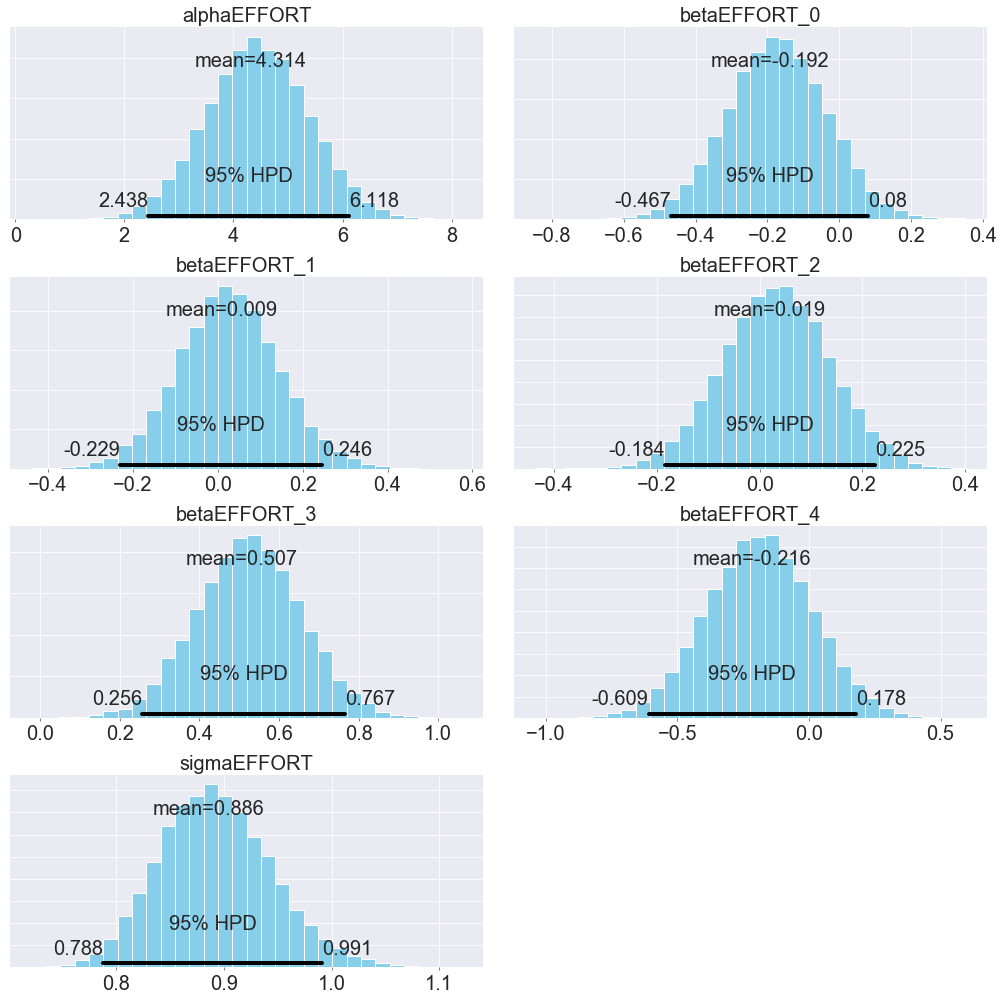

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


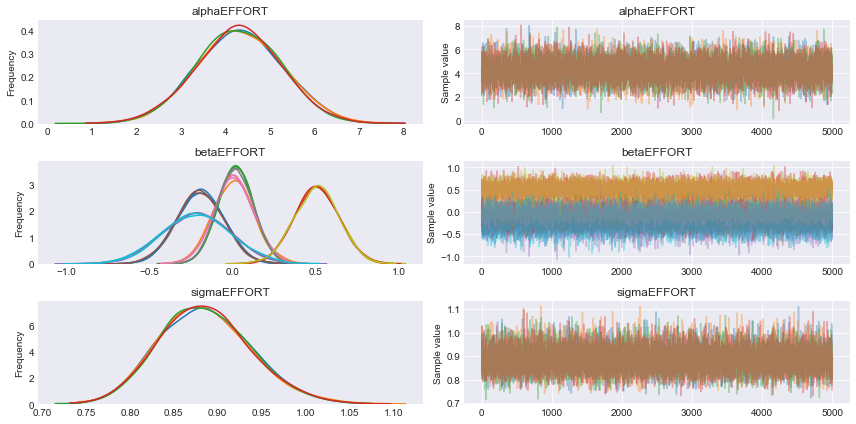

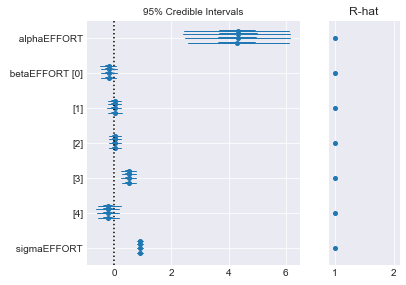

In [3]:
# EFFORT MODEL

modelA = pm.Model()

with modelA:

    # Priors for unknown model parameters
    alphaEFFORT = pm.Normal('alphaEFFORT', mu=0, sd=10)
    betaEFFORT  = pm.Normal('betaEFFORT', mu=0, sd=10, shape=5)
    sigmaEFFORT = pm.HalfNormal('sigmaEFFORT', sd=1)

    # Expected value of outcome
    muEFFORT = alphaEFFORT + betaEFFORT[0]*Empowerment + betaEFFORT[1]*Usefulness + betaEFFORT[2]*Success + betaEFFORT[3]*Interest + betaEFFORT[4]*Caring

    # Likelihood (sampling distribution) of observations
    Effort_obs = pm.Normal('Effort_obs', mu = muEFFORT, sd = sigmaEFFORT, observed = Effort)
    
    #MCMC 4 chains
    traceEFFORT = pm.sample(5000, cores=4)
    pm.plot_posterior(traceEFFORT, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceEFFORT) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceEFFORT);

In [4]:
pm.summary(traceEFFORT).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaEFFORT,4.31,0.95,0.01,2.44,6.12,10195.50,1.0
betaEFFORT__0,-0.19,0.14,0.00,-0.47,0.08,14686.46,1.0
betaEFFORT__1,0.01,0.12,0.00,-0.23,0.25,13328.86,1.0
betaEFFORT__2,0.02,0.10,0.00,-0.18,0.23,15092.77,1.0
betaEFFORT__3,0.51,0.13,0.00,0.26,0.77,12985.27,1.0
betaEFFORT__4,-0.22,0.20,0.00,-0.61,0.18,9400.18,1.0
sigmaEFFORT,0.89,0.05,0.00,0.79,0.99,14872.10,1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaFINALGRADE, betaFINALGRADE, alphaFINALGRADE]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [01:29<00:00, 246.29draws/s]
The acceptance probability does not match the target. It is 0.889008904714323, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8938929505868455, but should be close to 0.8. Try to increase the number of tuning steps.


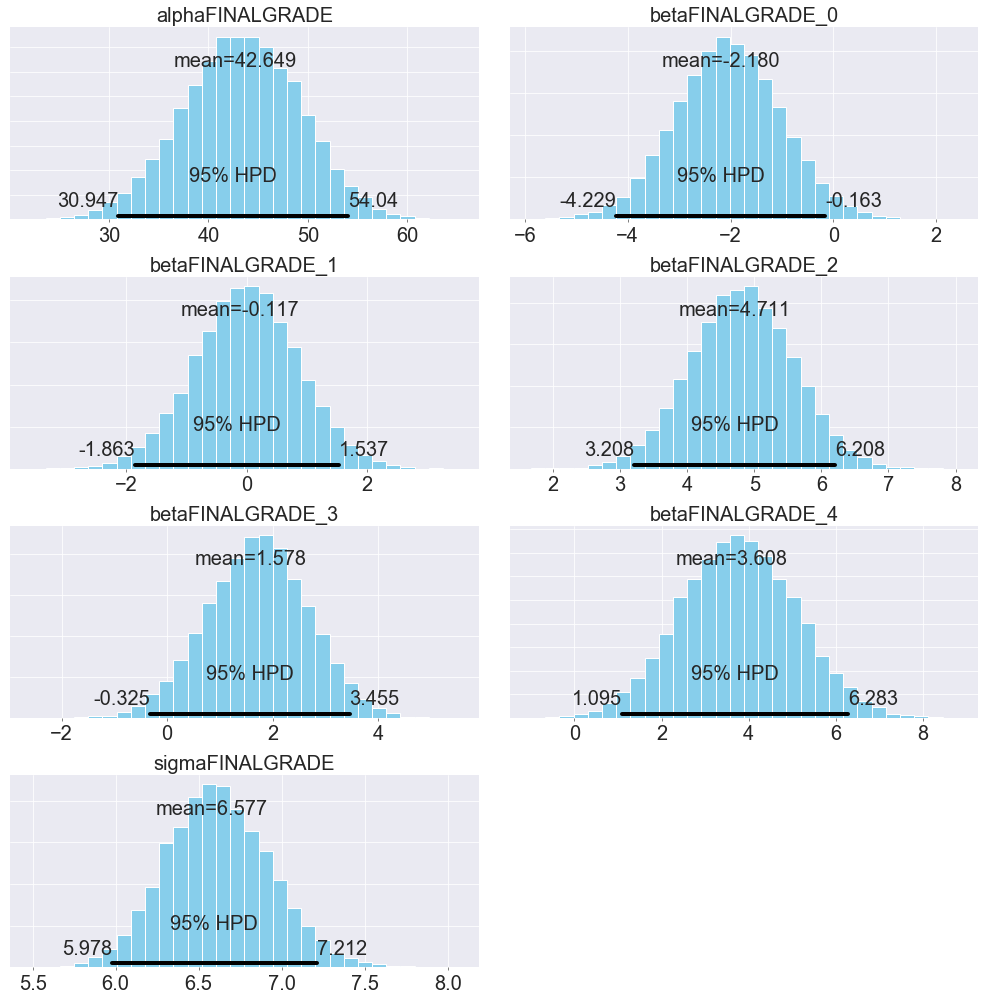

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


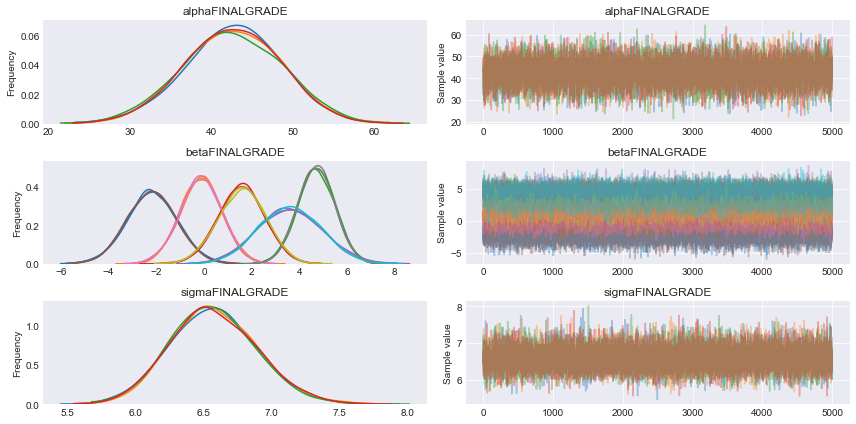

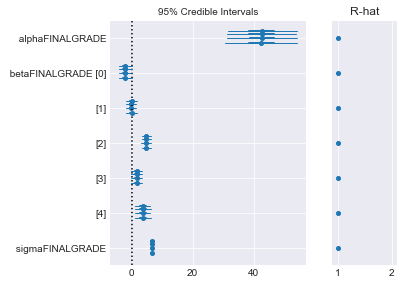

In [5]:
#FINAL GRADE MODEL

modelB = pm.Model()

with modelB:

    # Priors for unknown model parameters
    alphaFINALGRADE = pm.Normal('alphaFINALGRADE', mu=0, sd=10)
    betaFINALGRADE  = pm.Normal('betaFINALGRADE', mu=0, sd=10, shape=5)
    sigmaFINALGRADE = pm.HalfNormal('sigmaFINALGRADE', sd=1)

    # Expected value of outcome
    muFINALGRADE = alphaFINALGRADE + betaFINALGRADE[0]*Empowerment + betaFINALGRADE[1]*Usefulness + betaFINALGRADE[2]*Success + betaFINALGRADE[3]*Interest + betaFINALGRADE[4]*Caring

    # Likelihood (sampling distribution) of observations
    FinalGrade_obs = pm.Normal('FinalGrade_obs', mu = muFINALGRADE, sd = sigmaFINALGRADE, observed = FinalGrade)
    
    #MCMC 4 chains
    traceFINALGRADE = pm.sample(5000, cores=4)
    pm.plot_posterior(traceFINALGRADE, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceFINALGRADE) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceFINALGRADE);

In [6]:
pm.summary(traceFINALGRADE).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaFINALGRADE,42.65,5.91,0.05,30.95,54.04,11143.55,1.0
betaFINALGRADE__0,-2.18,1.04,0.01,-4.23,-0.16,17194.46,1.0
betaFINALGRADE__1,-0.12,0.87,0.01,-1.86,1.54,15013.95,1.0
betaFINALGRADE__2,4.71,0.77,0.01,3.21,6.21,17819.55,1.0
betaFINALGRADE__3,1.58,0.97,0.01,-0.33,3.46,14100.02,1.0
betaFINALGRADE__4,3.61,1.33,0.01,1.09,6.28,10522.93,1.0
sigmaFINALGRADE,6.58,0.32,0.00,5.98,7.21,17959.71,1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaINSTRUCTORRATING, betaINSTRUCTORRATING, alphaINSTRUCTORRATING]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [01:30<00:00, 241.95draws/s]


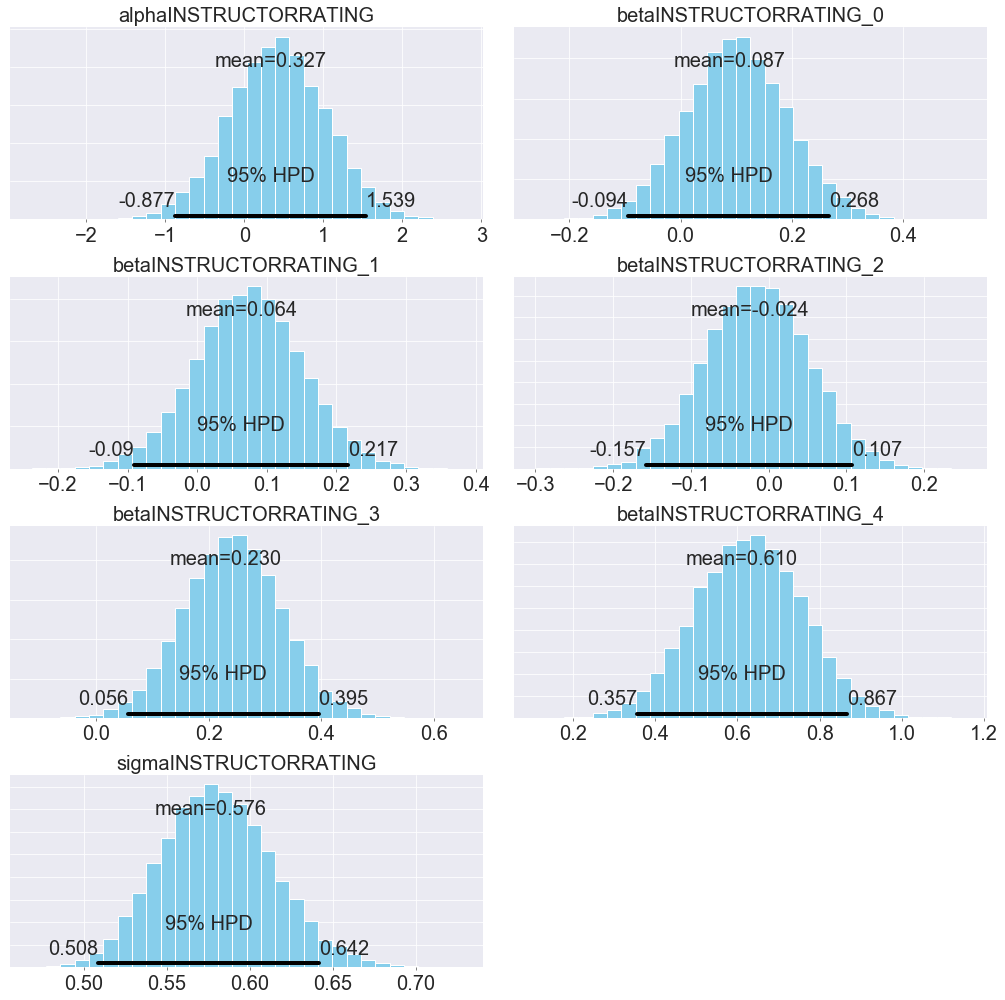

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


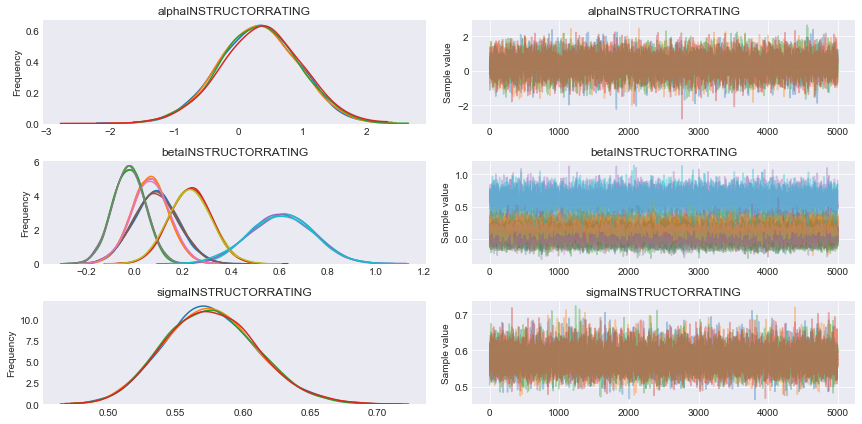

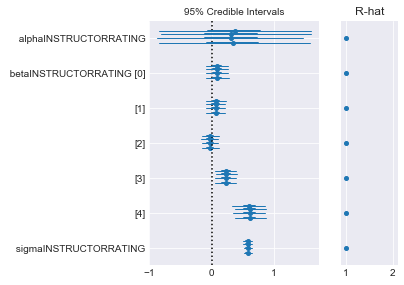

In [7]:
#INSTRUCTOR RATING MODEL

modelC = pm.Model()

with modelC:

    # Priors for unknown model parameters
    alphaINSTRUCTORRATING = pm.Normal('alphaINSTRUCTORRATING', mu=0, sd=10)
    betaINSTRUCTORRATING  = pm.Normal('betaINSTRUCTORRATING', mu=0, sd=10, shape=5)
    sigmaINSTRUCTORRATING = pm.HalfNormal('sigmaINSTRUCTORRATING', sd=1)

    # Expected value of outcome
    muINSTRUCTORRATING = alphaINSTRUCTORRATING + betaINSTRUCTORRATING[0]*Empowerment + betaINSTRUCTORRATING[1]*Usefulness + betaINSTRUCTORRATING[2]*Success + betaINSTRUCTORRATING[3]*Interest + betaINSTRUCTORRATING[4]*Caring

    # Likelihood (sampling distribution) of observations
    InstructorRating_obs = pm.Normal('InstructorRating_obs', mu = muINSTRUCTORRATING, sd = sigmaINSTRUCTORRATING, observed = InsRating)
    
    #MCMC 4 chains
    traceINSTRUCTORRATING = pm.sample(5000, cores=4)
    pm.plot_posterior(traceINSTRUCTORRATING, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceINSTRUCTORRATING) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceINSTRUCTORRATING);

In [8]:
pm.summary(traceINSTRUCTORRATING).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaINSTRUCTORRATING,0.33,0.62,0.01,-0.88,1.54,11648.77,1.0
betaINSTRUCTORRATING__0,0.09,0.09,0.00,-0.09,0.27,15115.57,1.0
betaINSTRUCTORRATING__1,0.06,0.08,0.00,-0.09,0.22,12848.17,1.0
betaINSTRUCTORRATING__2,-0.02,0.07,0.00,-0.16,0.11,14166.86,1.0
betaINSTRUCTORRATING__3,0.23,0.09,0.00,0.06,0.40,12816.30,1.0
betaINSTRUCTORRATING__4,0.61,0.13,0.00,0.36,0.87,10768.30,1.0
sigmaINSTRUCTORRATING,0.58,0.03,0.00,0.51,0.64,15358.16,1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaCOURSERATING, betaCOURSERATING, alphaCOURSERATING]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [01:15<00:00, 289.98draws/s]
The acceptance probability does not match the target. It is 0.8829608057820629, but should be close to 0.8. Try to increase the number of tuning steps.


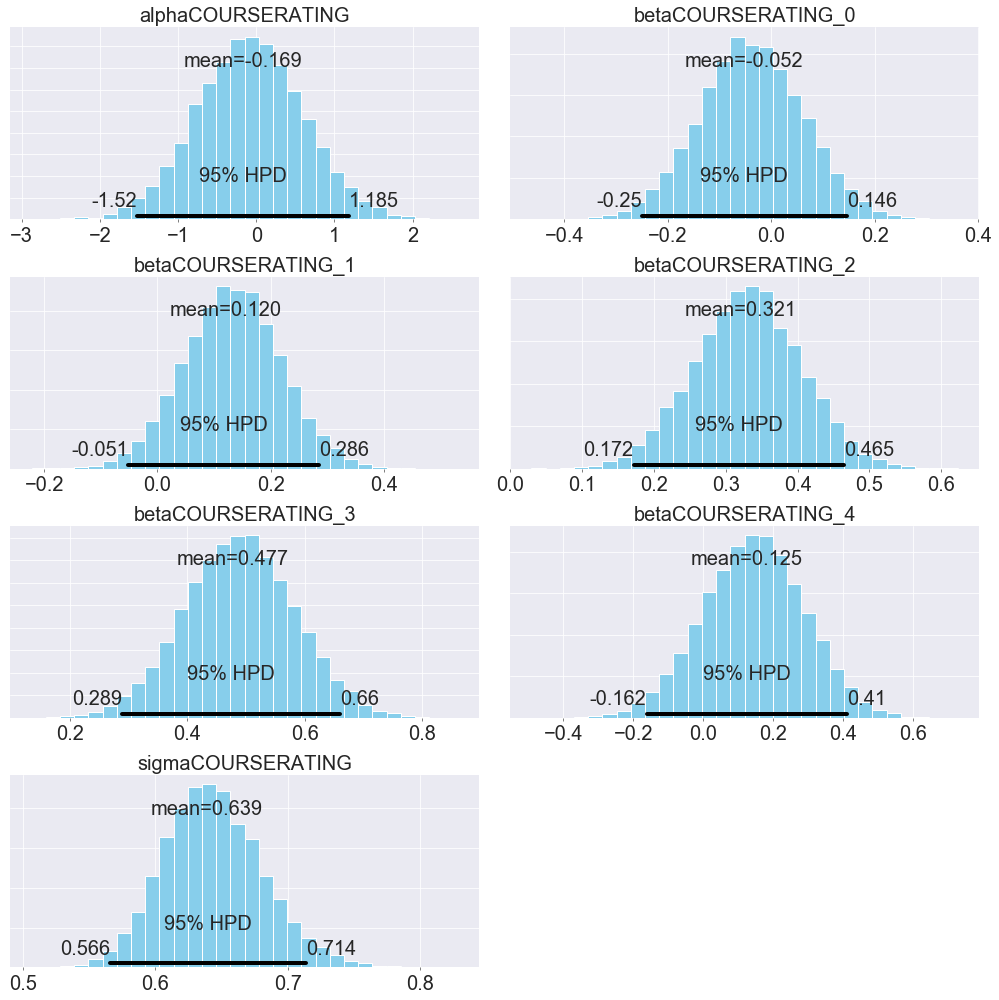

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


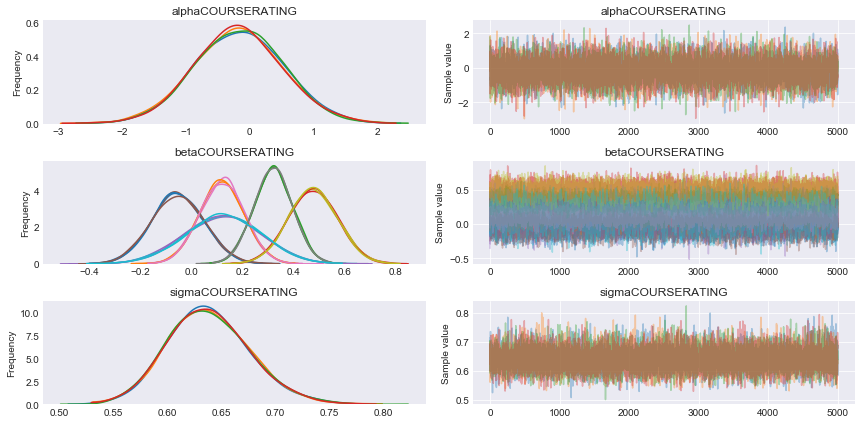

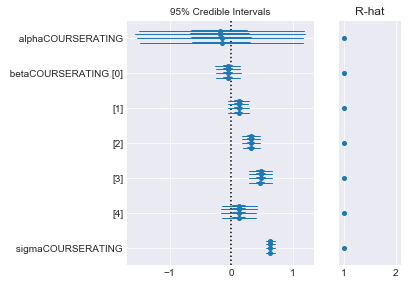

In [9]:
#COURSE RATING MODEL

modeld = pm.Model()

with modeld:

    # Priors for unknown model parameters
    alphaCOURSERATING = pm.Normal('alphaCOURSERATING', mu=0, sd=10)
    betaCOURSERATING  = pm.Normal('betaCOURSERATING', mu=0, sd=10, shape=5)
    sigmaCOURSERATING = pm.HalfNormal('sigmaCOURSERATING', sd=1)

    # Expected value of outcome
    muCOURSERATING = alphaCOURSERATING + betaCOURSERATING[0]*Empowerment + betaCOURSERATING[1]*Usefulness + betaCOURSERATING[2]*Success + betaCOURSERATING[3]*Interest + betaCOURSERATING[4]*Caring

    # Likelihood (sampling distribution) of observations
    CourseRating_obs = pm.Normal('CourseRating_obs', mu = muCOURSERATING, sd = sigmaCOURSERATING, observed = CourRating)
    
    #MCMC 4 chains
    traceCOURSERATING = pm.sample(5000, cores=4)
    pm.plot_posterior(traceCOURSERATING, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceCOURSERATING) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceCOURSERATING);

In [10]:
pm.summary(traceCOURSERATING).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaCOURSERATING,-0.17,0.69,0.01,-1.52,1.19,11124.03,1.0
betaCOURSERATING__0,-0.05,0.10,0.00,-0.25,0.15,14355.07,1.0
betaCOURSERATING__1,0.12,0.09,0.00,-0.05,0.29,12955.78,1.0
betaCOURSERATING__2,0.32,0.07,0.00,0.17,0.46,15886.20,1.0
betaCOURSERATING__3,0.48,0.09,0.00,0.29,0.66,11796.20,1.0
betaCOURSERATING__4,0.12,0.15,0.00,-0.16,0.41,10355.08,1.0
sigmaCOURSERATING,0.64,0.04,0.00,0.57,0.71,18093.38,1.0
